In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sunnysavita10/credit_card_pw_hindi/main/creditCardFraud_28011964_120214.csv')

In [4]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.shape

(1001, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [7]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,167532.467532,1.589411,1.776224,1.604396,34.945055,-0.004995,-0.161838,-0.164835,-0.283716,-0.283716,...,40748.408591,39078.666334,38012.011988,5382.339660,5051.400599,4176.149850,4671.488511,5331.049950,5090.704296,0.213786
std,130587.921320,0.492187,0.750916,0.532298,9.219760,1.173446,1.228732,1.262459,1.184662,1.170224,...,68206.929510,63108.238729,63074.415024,12180.755275,15626.153184,10514.647502,13269.943983,16812.536877,23658.888052,0.410183
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1423.000000,1206.000000,830.000000,1000.000000,390.000000,228.000000,148.000000,189.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17710.000000,17580.000000,15846.000000,2184.000000,1710.000000,1206.000000,1398.000000,1306.000000,1250.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,48851.000000,46404.000000,46557.000000,5090.000000,4500.000000,3720.000000,4000.000000,3745.000000,3784.000000,0.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000,1.000000


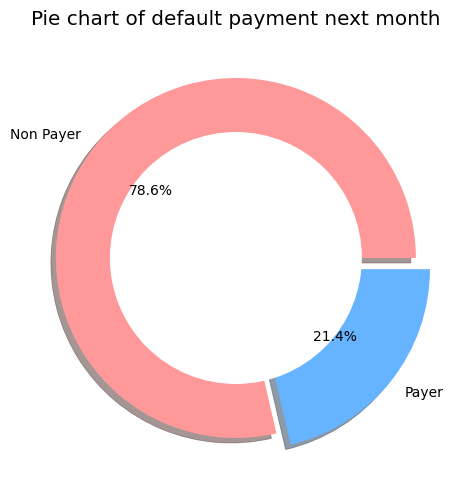

In [8]:
# let's plot pie chart of fraud and non frauds
fig1, ax1 = plt.subplots()
plt.pie(df['default payment next month'].value_counts(),colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],autopct='%1.1f%%',labels=['Non Payer','Payer'], shadow=True,explode=[0,0.1])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title('Pie chart of default payment next month')
plt.show()


##### 78.6% of credit card holder are not repaying on time whereas 21.4% of credit card holder are paying on time

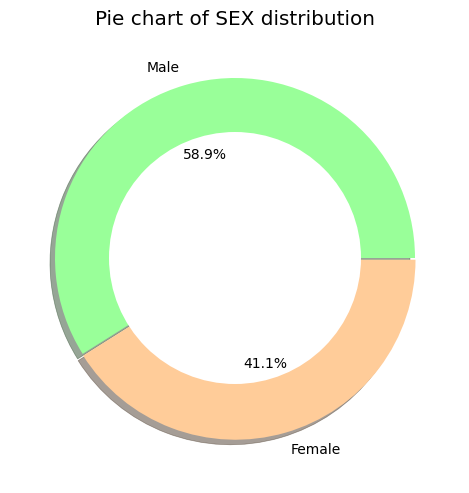

In [9]:
fig1, ax1 = plt.subplots()
plt.pie(df['SEX'].value_counts(),colors=['#99ff99','#ffcc99'],autopct='%1.1f%%',labels=['Male','Female'], shadow=True,explode=[0,0.01])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title('Pie chart of SEX distribution')
plt.show()

##### 58.9% of males are credit card holder and 41.1% of female are credit card holder

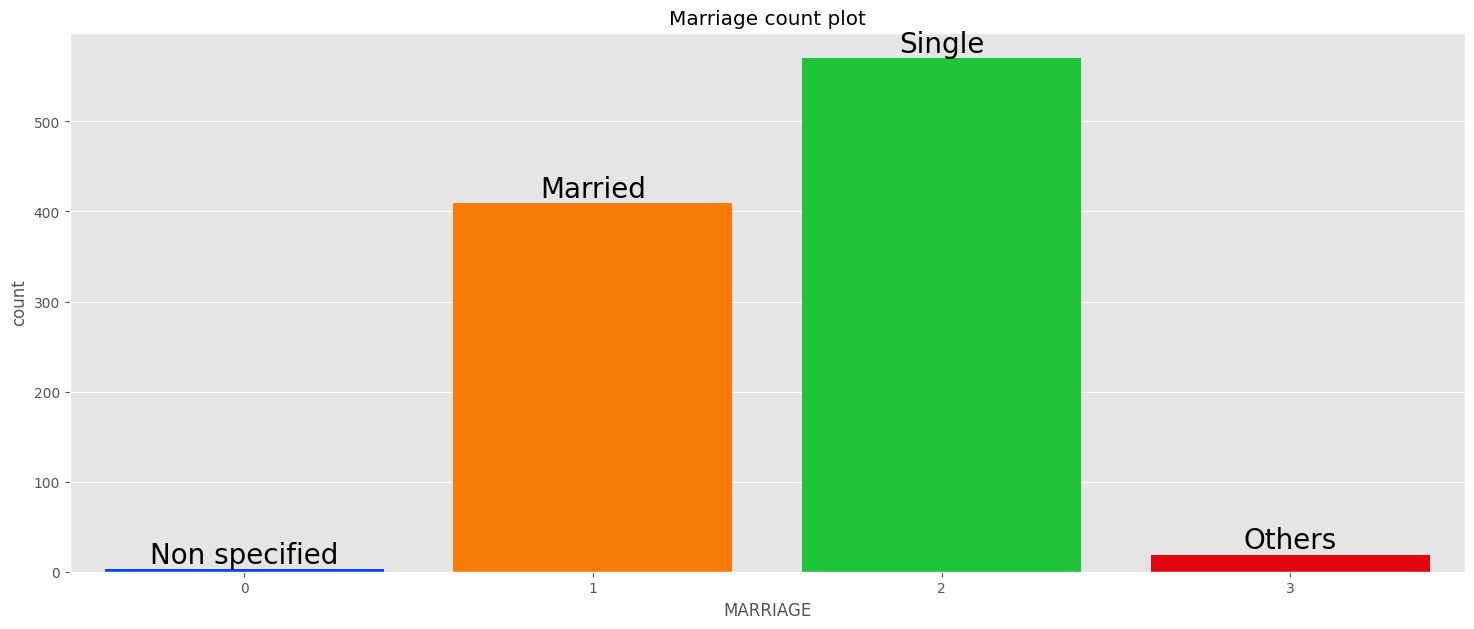

In [10]:
f,ax=plt.subplots(figsize=(18,7))
sns.countplot(x=df['MARRIAGE'],data=df,palette ='bright',ax=ax,saturation=0.95)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20,labels=['Non specified','Married','Single','Others'])
plt.title('Marriage count plot')
plt.show()


###### Single are more credit holder than married one

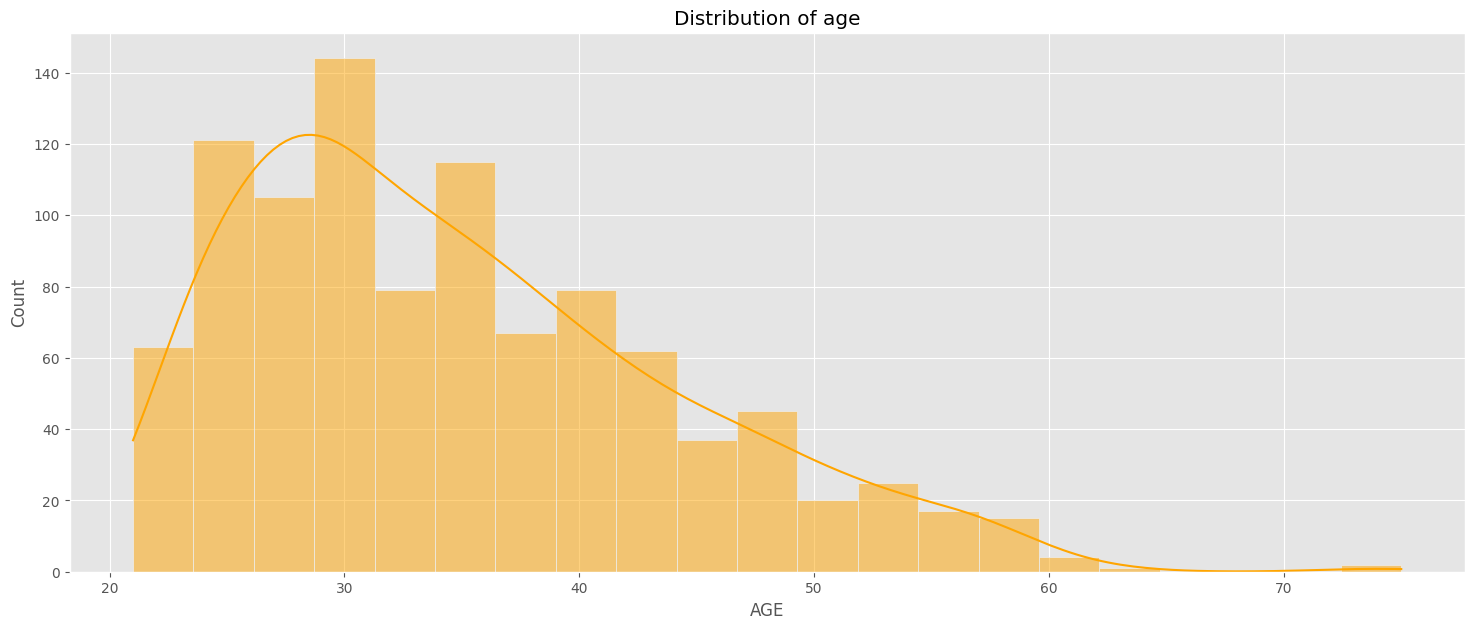

In [11]:
plt.figure(figsize=(18,7))
plt.title('Distribution of age')
sns.histplot(data=df['AGE'],kde=True,color='orange')
plt.show()

##### As the graph is right skewed we can say person whose age is lesser than 50 and greater than 25 are more credit holder

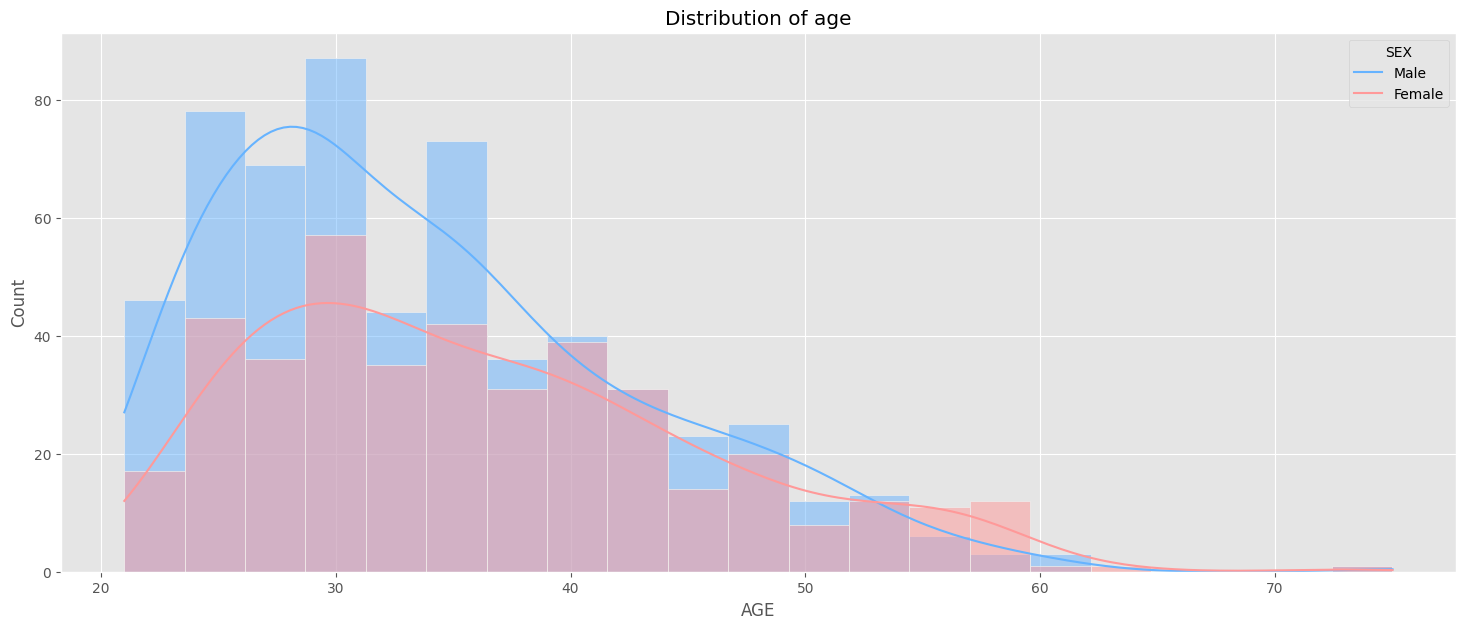

In [12]:
plt.figure(figsize=(18,7))
plt.title('Distribution of age')
sns.histplot(data=df,x=df['AGE'],kde=True,palette=['#ff9999','#66b3ff'],hue=df['SEX'])
plt.legend(title='SEX', labels=['Male','Female'])
plt.show()

In [13]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


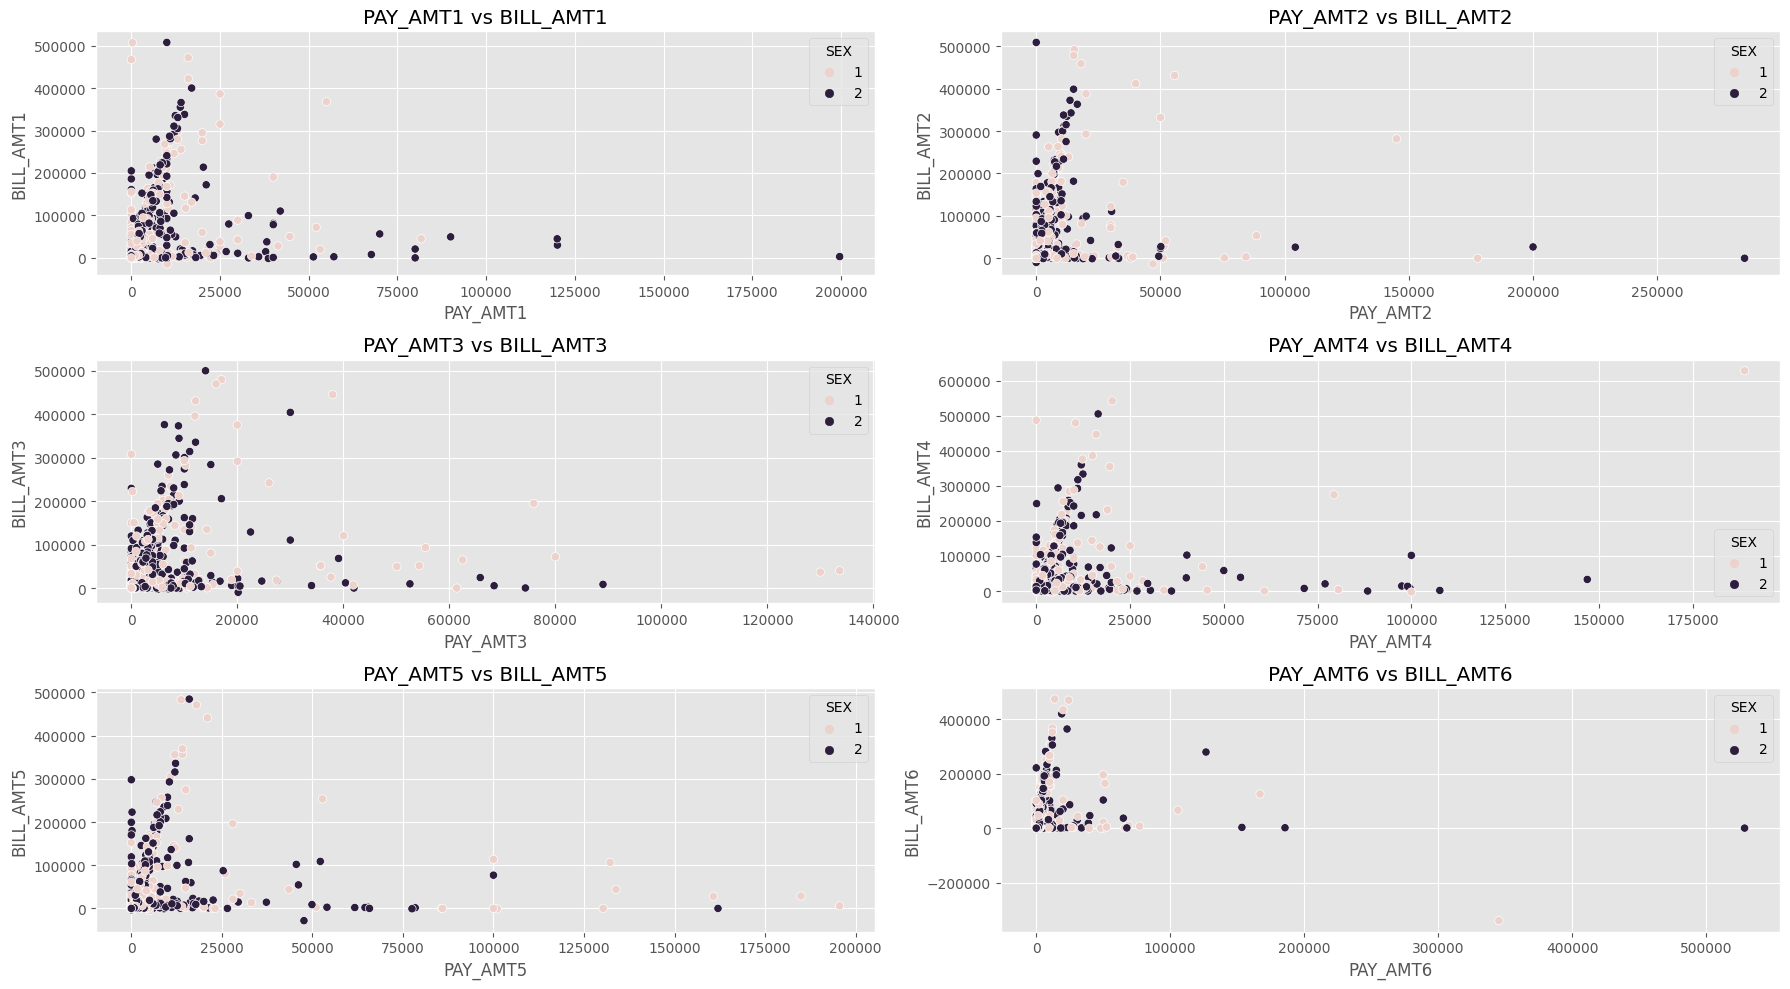

In [14]:
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
fig, axes = plt.subplots(3, 2, figsize=(18, 10))
for i, (pay_col, bill_col) in enumerate(zip(pay_cols, bill_cols)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.scatterplot(data=df, x=pay_col, y=bill_col ,ax=ax,hue='SEX')
    ax.set_title(f'{pay_col} vs {bill_col}')
plt.tight_layout()

##### The bill amount is high but payment done against the same is very low.

##### Segregating features into independent and dependent feature

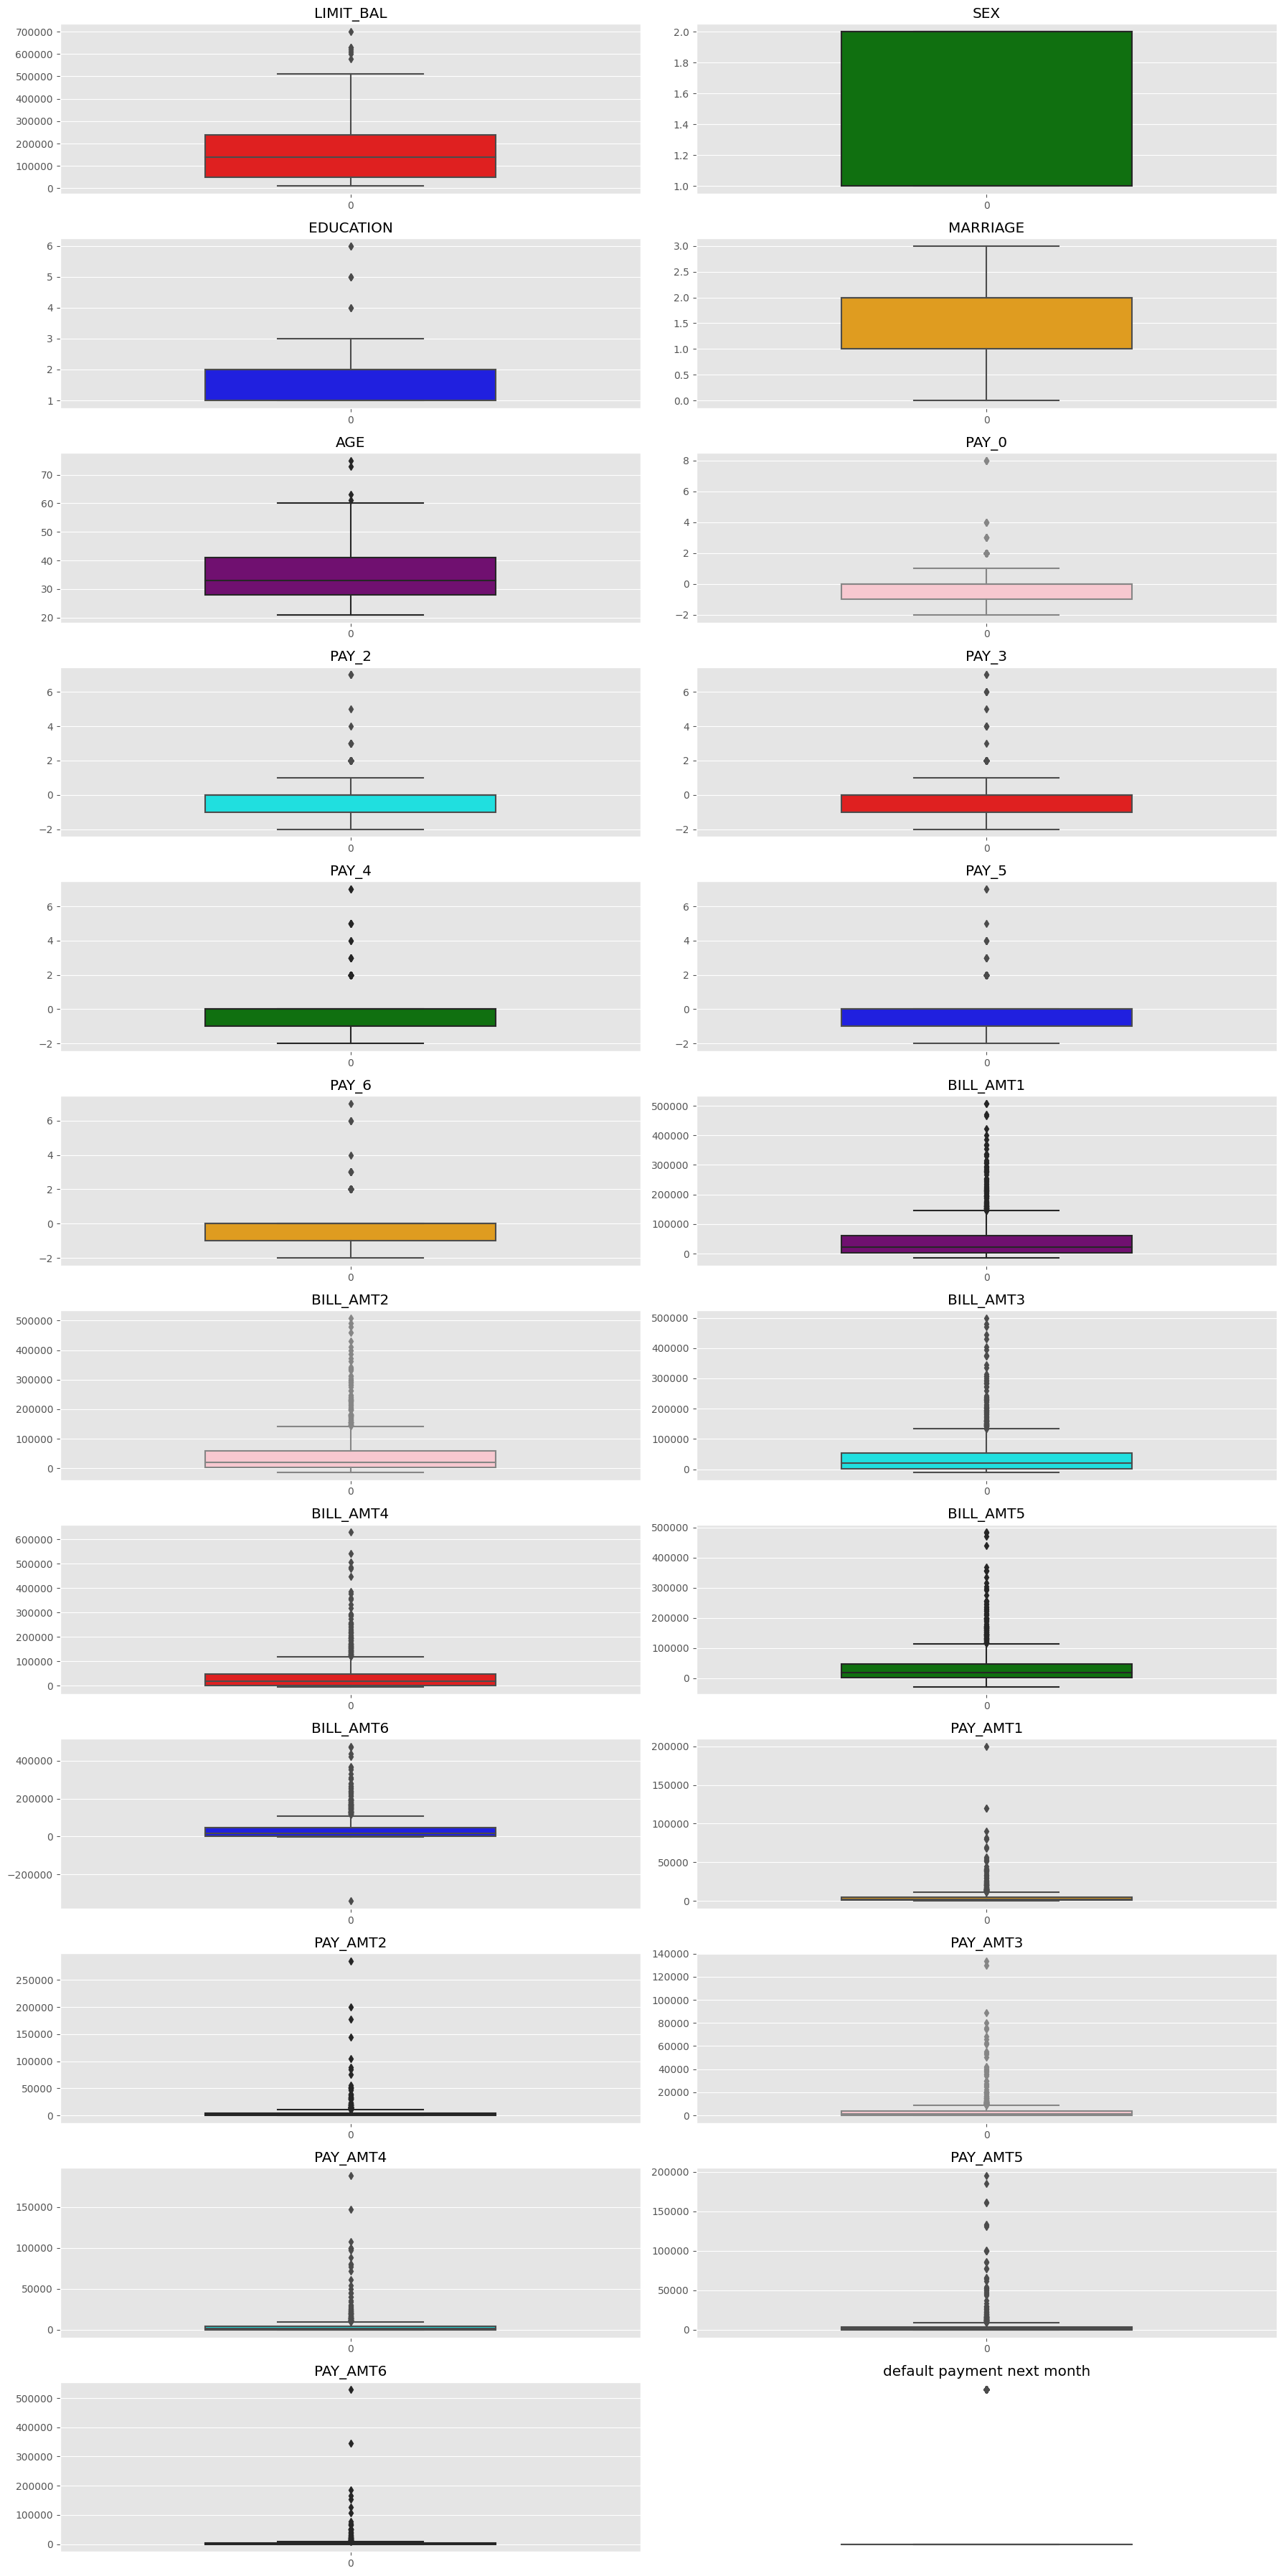

In [15]:
fig, axes = plt.subplots(nrows=(len(df.columns) - 1) // 2 + 1, ncols=2, figsize=(18, 36))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots
boxplot_colors = ['red', 'green', 'blue', 'orange', 'purple','pink','aqua']  

# Iterate over the columns
for i, col in enumerate(df.columns):
    row = i // 2
    col_index = i % 2
    ax = axes[row, col_index]
    boxplot_color = boxplot_colors[i % len(boxplot_colors)]
    sns.boxplot(data=df[col], fliersize=5, ax=ax, color=boxplot_color, width=0.5)
    ax.set_title(col)
# Hide the last subplot
if (len(df.columns) - 1) % 2 != 0:
    axes[-1, -1].axis('off')
plt.tight_layout()
plt.show()

##### Train test and split

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Xgboost' : XGBClassifier(),
    'Knn' : KNeighborsClassifier(),
    # 'SVC' : SVC(),
    'GNB' : GaussianNB()
}

In [20]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve
)

In [21]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [24]:
for idx in range(len(models.keys())):
    model = list(models.values())[idx]
    # model train 
    print(f'{model} training started.')
    model.fit(X_train,y_train)
    print(f'Prediction started for X_train, X_test')
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_pred_train)
    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_pred_test)
    
    print(f'Model performance for Training set:')
    print("Accuracy score: {:.4f}".format(float(train_accuracy)))
    print("Precision score: {:.4f}".format(float(train_precision)))
    print("Recall score: {:.4f}".format(float(train_recall)))
    print("F1 score: {:.4f}".format(float(train_f1)))
    print("+"*30)
    print(f'Model performance for Test set:')
    print("Accuracy score: {:.4f}".format(float(test_accuracy)))
    print("Precision score: {:.4f}".format(float(test_precision)))
    print("Recall score: {:.4f}".format(float(test_recall)))
    print("F1 score: {:.4f}".format(float(test_f1)))
    print("="*50)

LogisticRegression() training started.
Prediction started for X_train, X_test
Model performance for Training set:
Accuracy score: 0.7762
Precision score: 0.6000
Recall score: 0.0167
F1 score: 0.0324
++++++++++++++++++++++++++++++
Model performance for Test set:
Accuracy score: 0.8308
Precision score: 0.0000
Recall score: 0.0000
F1 score: 0.0000
DecisionTreeClassifier() training started.
Prediction started for X_train, X_test
Model performance for Training set:
Accuracy score: 1.0000
Precision score: 1.0000
Recall score: 1.0000
F1 score: 1.0000
++++++++++++++++++++++++++++++
Model performance for Test set:
Accuracy score: 0.7761
Precision score: 0.3429
Recall score: 0.3529
F1 score: 0.3478
RandomForestClassifier() training started.
Prediction started for X_train, X_test
Model performance for Training set:
Accuracy score: 1.0000
Precision score: 1.0000
Recall score: 1.0000
F1 score: 1.0000
++++++++++++++++++++++++++++++
Model performance for Test set:
Accuracy score: 0.8557
Precision sco

AttributeError: 'Flags' object has no attribute 'c_contiguous'

#### ROC ana AUC Curve

AttributeError: 'Flags' object has no attribute 'c_contiguous'

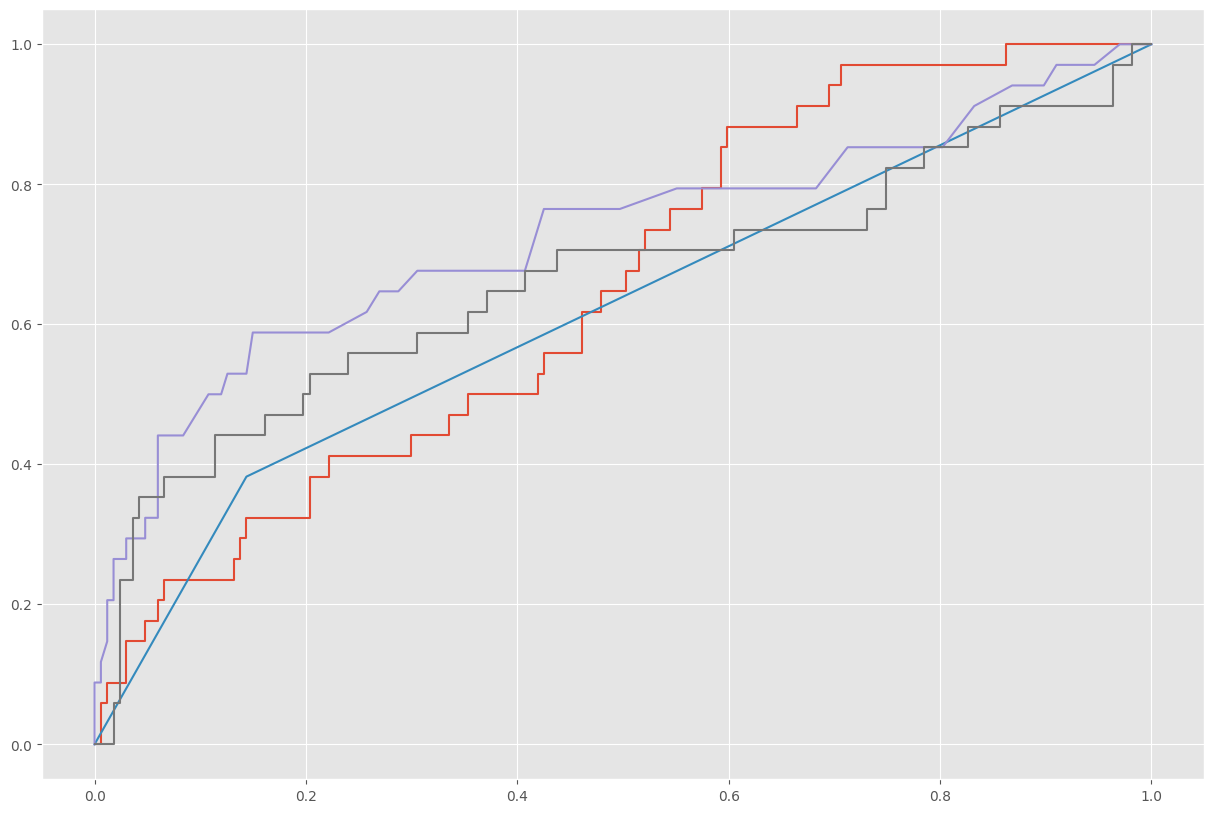

In [25]:
plt.figure(figsize=(15,10))
from sklearn.metrics import roc_curve, auc
for model_name, model in models.items():
    if isinstance(model,SVC):
        model.probability = True
    model.fit(X_train,y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # calculate fpr, tpr, and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # auc
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # decision boudry
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
optimal_threshold

0.26740882

AttributeError: 'Flags' object has no attribute 'c_contiguous'

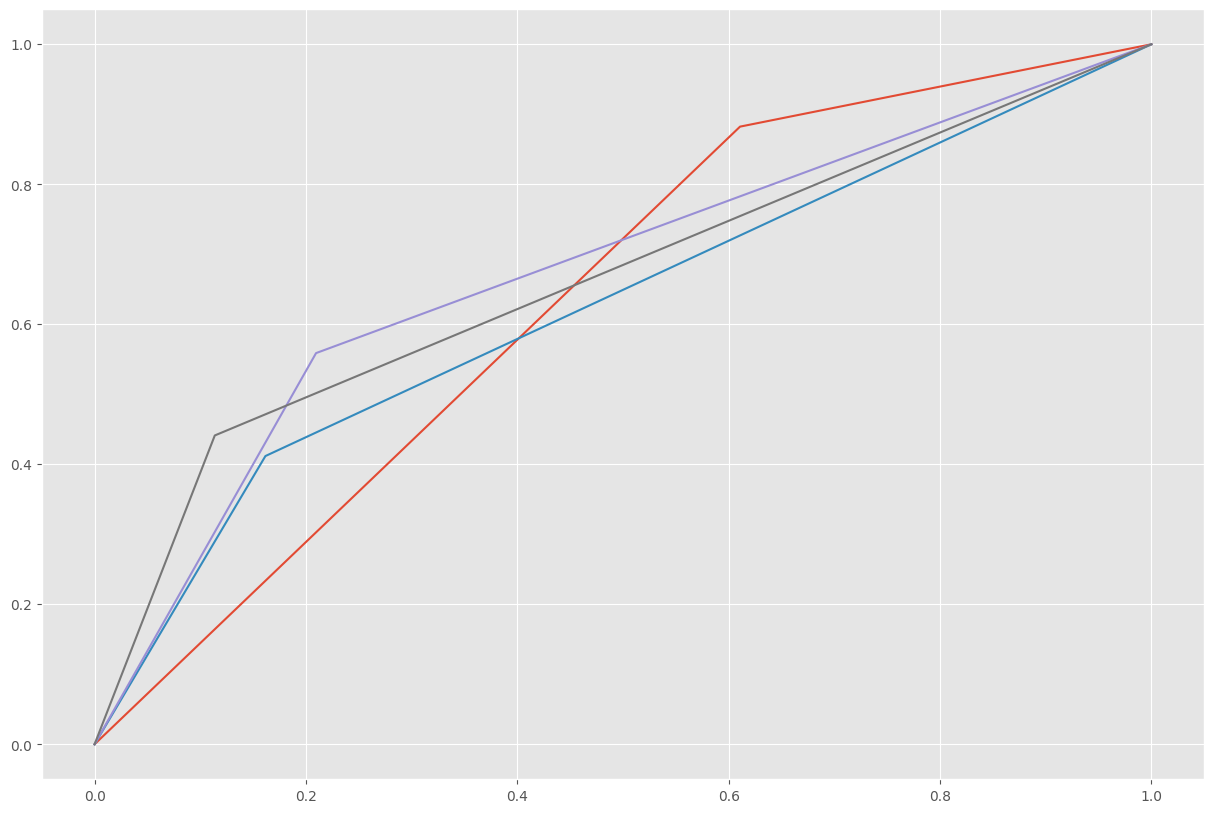

In [27]:
plt.figure(figsize=(15,10))
from sklearn.metrics import roc_curve, auc
for model_name, model in models.items():
    if isinstance(model,SVC):
        model.probability = True
    model.fit(X_train,y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # calculate fpr, tpr, and threshold
    y_pred = (y_pred_prob >= optimal_threshold).astype(int)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # auc
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # decision boudry
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Model Training with hyperparameter tunning with gridsearchcv

In [28]:
hyperparameters = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'Svc': {
        # 'C': [0.1, 1, 10],
        # 'kernel': ['linear', 'rbf'],
        # 'gamma': ['scale', 'auto']
    },
    'Xgboost': {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 10],
        'min_child_weight': [1, 5, 10]
    },
    'Knn':{
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'GNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}

In [29]:
from sklearn.model_selection import GridSearchCV

Logistic Regression training started.
Prediction started for X_train, X_test


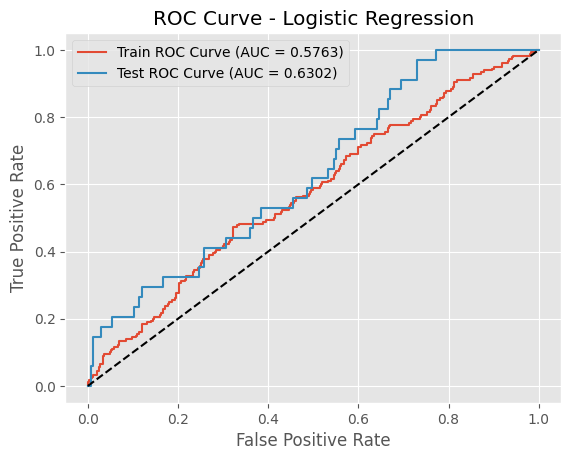

Decision Tree training started.
Prediction started for X_train, X_test


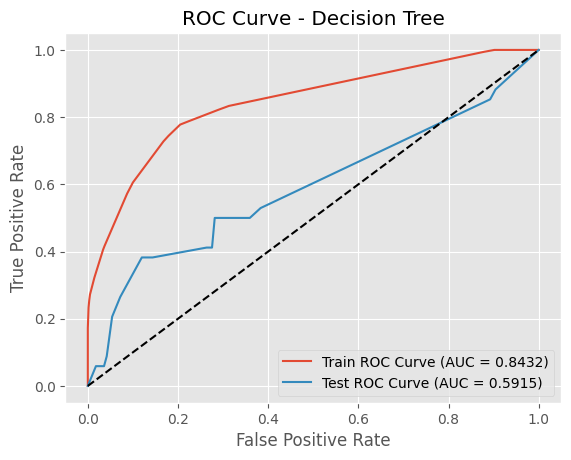

Random Forest training started.
Prediction started for X_train, X_test


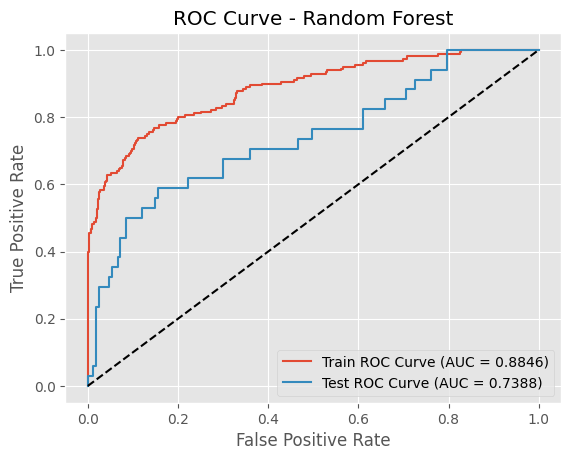

Xgboost training started.
Prediction started for X_train, X_test


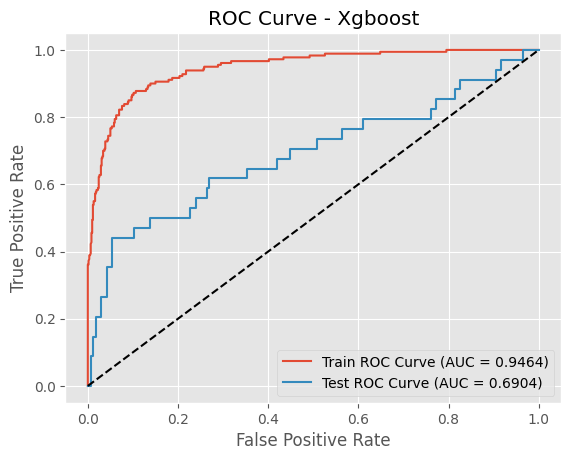

Knn training started.
Prediction started for X_train, X_test


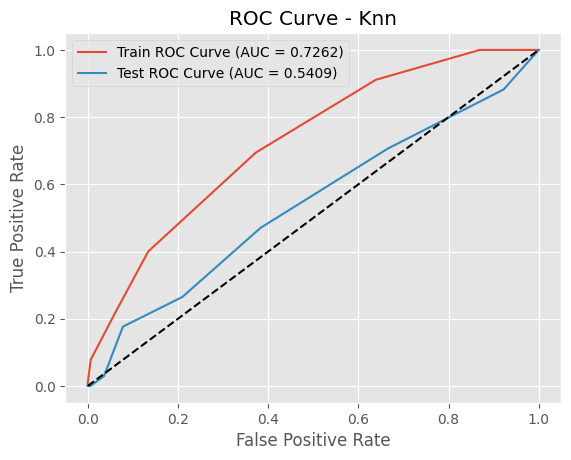

GNB training started.
Prediction started for X_train, X_test


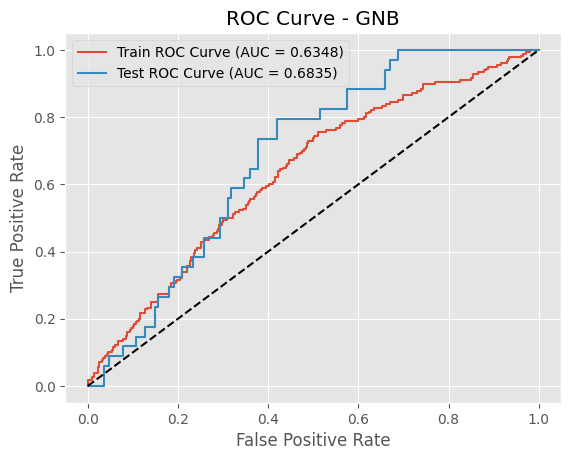

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

for idx, (model_name, model) in enumerate(models.items()):
    print(f'{model_name} training started.')
    
    # Define the parameter grid for the current model
    param_grid = hyperparameters[model_name]
    
    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model with tuned hyperparameters
    best_model = grid_search.best_estimator_
    
    print(f'Prediction started for X_train, X_test')
    y_pred_train = best_model.predict_proba(X_train)[:, 1]  # Use predicted probabilities for ROC curve
    y_pred_test = best_model.predict_proba(X_test)[:, 1]
    
    train_fpr, train_tpr, _ = roc_curve(y_train, y_pred_train)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_test)
    
    train_auc = roc_auc_score(y_train, y_pred_train)
    test_auc = roc_auc_score(y_test, y_pred_test)
    
    # Plot ROC curve
    plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {train_auc:.4f})')
    plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()
    
    print("="*50)
